In [10]:
using CALFEM

### Mesh

In [2]:
Edof, Ex, Ey, 
B1, B2, B3, B4, coords, dofs = gen_quad_mesh([0.0, 0.0], [1.0, 1.0], 3, 3, 2);

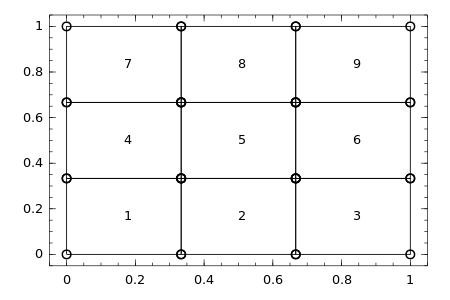

In [9]:
eldraw2(Ex, Ey, [1,1,0], 1:9)

### Boundary conditions

Imposed field: $u_x = u_y = 0.1x + 0.05y$

In [4]:
cx = 0.1
cy = 0.05
bc_dofs = union(B1[:], B2[:], B3[:], B4[:])
bc = zeros(length(bc_dofs), 2)
for i in 1:size(bc, 1)
    dof = bc_dofs[i]
    node = div(dof+1, 2)
    bc[i, 1] = dof
    bc[i, 2] = cx * coords[1, node] + cy * coords[2, node,]
end

### Solve

In [5]:
ndofs = length(dofs)
K = spzeros(ndofs, ndofs)
D = hooke(2, 250e9, 0.3)
for e in 1:size(Edof, 2)
    ex = Ex[:, e]
    ey = Ey[:, e]
    Ke, _ = plani4e(ex, ey, [2, 1, 2], D)
    assem(Edof[:, e], K, Ke)
end
a, _ = solveq(K, zeros(length(dofs)), bc);

### Deformed structure

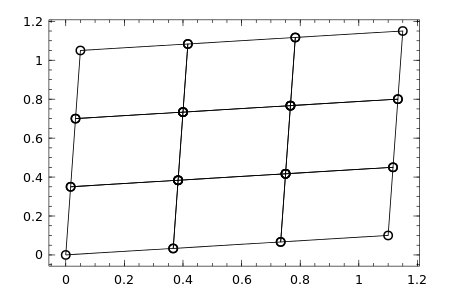

In [6]:
Ed = extract(Edof, a);
eldisp2(Ex, Ey, Ed)

In [7]:
# Displacements center element
Ed[:,5]

8-element Array{Float64,1}:
 0.05     
 0.05     
 0.0833333
 0.0833333
 0.1      
 0.1      
 0.0666667
 0.0666667

In [8]:
# Center nodes: 6 7 10 11
coords[:, [6,7,10,11]]' * [cx; cy]

4-element Array{Float64,1}:
 0.05     
 0.0833333
 0.0666667
 0.1      